In [3]:
pip install pystan==2.19

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 69.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.0.0-cp38-cp38-linux_x86_64.whl size=61787815 sha256=bfa69050e492e6ebac657c2b07af8b22403a47ce74cf1d8ad88fbff8b5803993
  Stored in directory: /root/.cache/pip/wheels/92/af/46/7a021b32f4f0dec5d0a7b669e13b95a40a62ce007ac1039442
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [4]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 184.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9086632 sha256=4e14d85d5f5e6ba19c67f1fef772b0f1b23e9a6ddc5deb5f11575aed9bb9a64f
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [5]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np
import pandas as pd 
import random as rd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns 
from fbprophet import Prophet
import statsmodels.tsa.api as smt
import statsmodels.api as sn
from statsmodels.tsa.stattools import adfuller


In [9]:
df = pd.read_csv("/content/google-data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [11]:
df['date'] = pd.to_datetime(df['Date']).dt.strftime("%d/%m/%y")
df.drop(columns=["Date"], inplace =True)

In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
0,357.385559,361.151062,355.959839,359.288177,359.288177,5115500,02/01/13
1,360.122742,363.600128,358.031342,359.496826,359.496826,4666500,03/01/13
2,362.313507,368.339294,361.488861,366.600616,366.600616,5562800,04/01/13
3,365.348755,367.301056,362.929504,365.001007,365.001007,3332900,07/01/13
4,365.393463,365.771027,359.874359,364.280701,364.280701,3373900,08/01/13


In [13]:
data = pd.DataFrame()
data["date"] = pd.date_range(start = "2013-01-02", end = '2017-12-29')
data["date"] = data["date"].dt.strftime("%d/%m/%y")
data = data.merge(df, how= "left", on ="date")

In [14]:
data.head(7)

,date,Open,High,Low,Close,Adj Close,Volume
0,02/01/13,357.385559,361.151062,355.959839,359.288177,359.288177,5115500.0
1,03/01/13,360.122742,363.600128,358.031342,359.496826,359.496826,4666500.0
2,04/01/13,362.313507,368.339294,361.488861,366.600616,366.600616,5562800.0
3,05/01/13,NaN,NaN,NaN,NaN,NaN,NaN
4,06/01/13,NaN,NaN,NaN,NaN,NaN,NaN
5,07/01/13,365.348755,367.301056,362.929504,365.001007,365.001007,3332900.0
6,08/01/13,365.393463,365.771027,359.874359,364.280701,364.280701,3373900.0


In [15]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for colm in numeric_columns:
  data[colm] = data[colm].interpolate(method='cubic')

In [16]:
data.head(3)

,date,Open,High,Low,Close,Adj Close,Volume
0,02/01/13,357.385559,361.151062,355.959839,359.288177,359.288177,5115500.0
1,03/01/13,360.122742,363.600128,358.031342,359.496826,359.496826,4666500.0
2,04/01/13,362.313507,368.339294,361.488861,366.600616,366.600616,5562800.0


In [17]:
a = sn.tsa.seasonal_decompose(data.Close.values, freq = 365, model = "additive")

<ipython-input-17-c0c0a0d88521>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  a = sn.tsa.seasonal_decompose(data.Close.values, freq = 365, model = "additive")


In [20]:
m = sn.tsa.seasonal_decompose(data.Close.values, freq = 65, model = "multiplicacative")

<ipython-input-20-6a0802ef6444>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  m = sn.tsa.seasonal_decompose(data.Close.values, freq = 65, model = "multiplicacative")


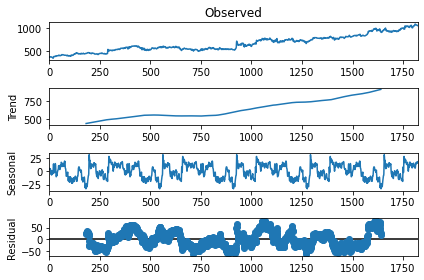

In [18]:
fig = a.plot()

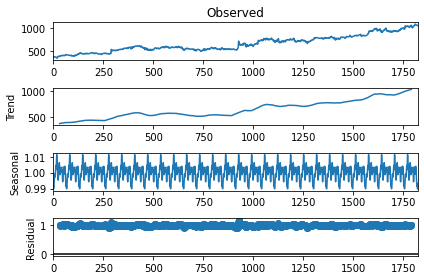

In [21]:
fig = m.plot()

In [22]:
def st_check(timeseries):
  dftest = adfuller(timeseries, autolag = "AIC")
  dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic","P-Value","LAGS USED","Number of Observations Used"])
  for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key]= value
  print(dfoutput)

st_check(data.Close)

Test Statistic                   -0.232731
P-Value                           0.934506
LAGS USED                         5.000000
Number of Observations Used    1817.000000
Critical Value (1%)              -3.433954
Critical Value (5%)              -2.863132
Critical Value (10%)             -2.567618
dtype: float64


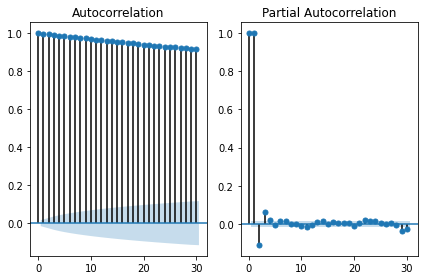

In [23]:
l = (1,2)
a = plt.subplot2grid(l,(0,0))
p = plt.subplot2grid(l,(0,1))
smt.graphics.plot_acf(data.Close, lags = 30, ax = a, alpha = 0.5)
smt.graphics.plot_pacf(data.Close, lags = 30, ax = p, alpha = 0.5)
plt.tight_layout()

In [24]:
model_df = data.loc[:,["date",'Close']].rename(columns={"date":"ds", "Close":"y"})
model_df.head()

,ds,y
0,02/01/13,359.288177
1,03/01/13,359.496826
2,04/01/13,366.600616
3,05/01/13,369.244832
4,06/01/13,367.666599


In [26]:
model = Prophet(yearly_seasonality = True, interval_width = 0.95)
model.fit(model_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
ft = model.make_future_dataframe(periods = 365)
pred = model.predict(ft)
pred[["ds","yhat",'yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2183,2018-12-25,1259.667269,1124.137478,1403.774511
2184,2018-12-26,1264.852183,1132.655060,1389.270023
2185,2018-12-27,1271.124013,1139.456123,1391.896891
2186,2018-12-28,1273.560297,1138.639118,1404.259317
2187,2018-12-29,1276.962384,1154.703147,1420.352537


Text(0.5, 1.0, 'Google Stock Prices')

<Figure size 1152x576 with 0 Axes>

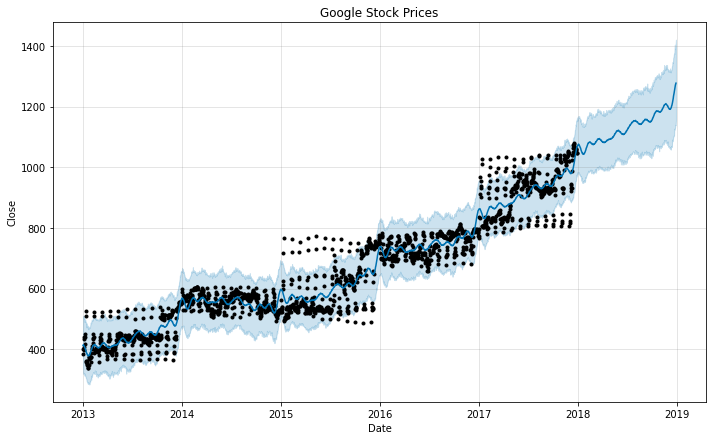

In [30]:
plt.figure(figsize=(16,8))
model.plot(pred, xlabel ='Date', ylabel = 'Close')
plt.title("Google Stock Prices")

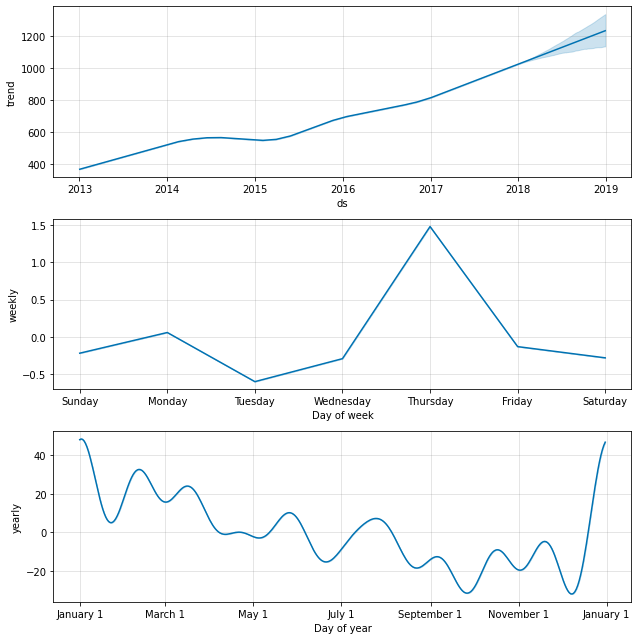

In [29]:
fig = model.plot_components(pred)